# Data visualization - American dream

In [1]:
#Modules
import seaborn as sns
import pandas as pd
import numpy as np
import sqlalchemy
import mysql.connector


import sys
sys.path.insert(0, "/home/apprenant/PycharmProjects/American_dream")


from src.d00_utils.mysql_func import mysql_connect, save_to_mysql
connect = mysql_connect()

In [2]:
import matplotlib.pyplot as plt

In [18]:
import matplotlib.ticker as mtick

## Importation des données

In [3]:
df1 = pd.read_sql("survey_1_v2.0",con=connect)

### Fonctions

In [7]:
# Function for formatting salary on "xK $"
def to_k_usd(x):
    return str(int((x / 1000))) + "K $"

## Salaire moyen, médian et 10 déciles pour les travailleurs aux Etats Unis

### Database 1

In [6]:
print(round(df1['SalaryUSD'].mean()))

108579


Le salaire moyen aux Etats Unis est 108 653 USD.

In [5]:
print(df1['SalaryUSD'].median())

103000.0


Le salaire médian aux Etats Unis est 103 000 USD.

In [8]:
salary_mean = df1["SalaryUSD"].mean()
salary_med = df1["SalaryUSD"].median()


print("Le salaire annuel moyen aux USA est de {} et le salaire médian est de {}".format(to_k_usd(salary_mean), to_k_usd(salary_med)))

Le salaire annuel moyen aux USA est de 108K $ et le salaire médian est de 103K $


In [16]:
deciles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
print(df_usa['SalaryUSD'].quantile(deciles))

0.1     67500.0
0.2     80000.0
0.3     89000.0
0.4     95000.0
0.5    103000.0
0.6    110000.0
0.7    120000.0
0.8    130000.0
0.9    145000.0
Name: SalaryUSD, dtype: float64


<AxesSubplot:title={'center':'Répartition des deciles'}>

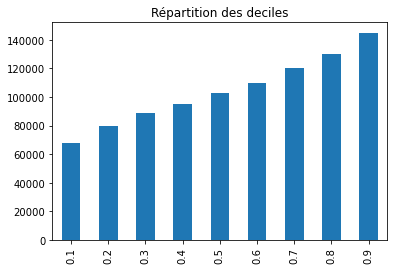

In [18]:
df_usa['SalaryUSD'].quantile(deciles).plot(kind='bar', title="Répartition des deciles")

## Salaire moyen en fonction du job title + diagramme circulaire

### Salaire moyen en fonction du job title 

In [9]:
# create a new dataframe
data_salary=pd.DataFrame(df1[['JobTitle', 'SalaryUSD']].groupby('JobTitle')['SalaryUSD'].mean())
data_salary.reset_index(0, inplace=True)
data_salary=data_salary.sort_values(by='SalaryUSD', ascending = False)
data_salary.head()

,JobTitle,SalaryUSD
1,Architect,136769.042283
6,Manager,131092.651948
2,Data Scientist,122205.216216
5,Engineer,114623.905797
3,Database Admin,106307.136105


Text(0, 0.5, 'Job Titles')

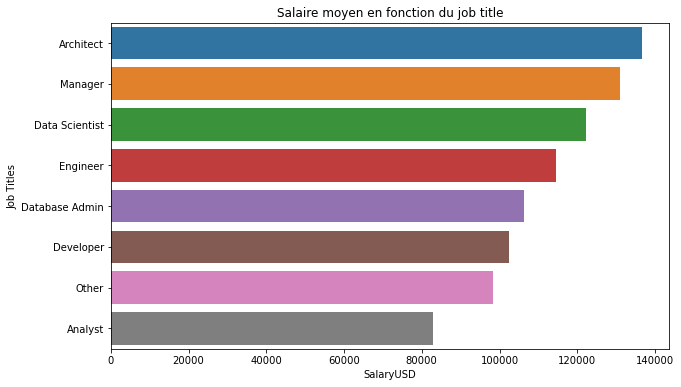

In [20]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Salaire moyen en fonction du job title")

# Bar chart
sns.barplot(x=data_salary.SalaryUSD, y=data_salary.JobTitle)

# Add label for vertical axis
plt.ylabel("Job Titles")

### Diagramme circulaire de la répartitions des jobtitles

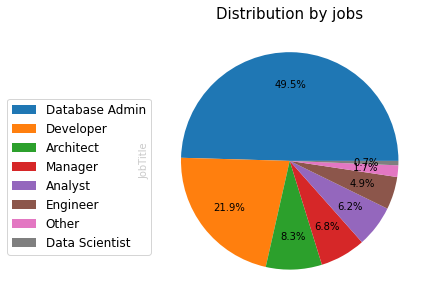

In [17]:
labels = df1["JobTitle"].value_counts().index
values = df1["JobTitle"].value_counts()
#fig, ax = plt.subplots()
values.plot.pie(autopct="%1.1f%%", pctdistance=0.7, figsize=(5,5), labels=None)
plt.title("Distribution by jobs", fontsize=15)
plt.legend(labels, bbox_to_anchor=(0.01, 0.75),
           fontsize=12)

# Questions

## Est-il préférable de travailler pour une seule ou plusieurs compagnies?

<AxesSubplot:title={'center':'Salaire moyen en fonction du nombre de compagnies'}, xlabel='SalaryUSD', ylabel='HowManyCompanies'>

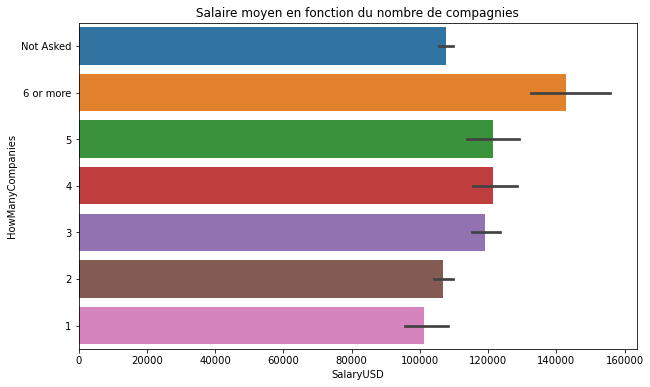

In [16]:
data_companies = pd.DataFrame(df1[['SalaryUSD', 'HowManyCompanies']]).sort_values(by='HowManyCompanies', ascending = False)
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Salaire moyen en fonction du nombre de compagnies")

# Bar chart
sns.barplot(y=data_companies.HowManyCompanies, x=data_companies.SalaryUSD)

Si on regarde le salaire moyen, travailler dans plusieurs compagnies permet d'avoir un salaire plus élevé.
Néanmoins, on remarque que si le nombre de compagnies est égal à 3 ou 4, il n'y a pas vraiment de différence de salaire.
De plus, si on prend en compte les écarts de salaire dans chaque catégorie, on remarque que les salaires pevent se recouper entre catégories adjacentes.

## Le nombre de personnes dans son équipe a-t-il une influence sur votre salaire?

In [181]:
data_team = pd.DataFrame(df1[['SalaryUSD', 'OtherPeopleOnYourTeam']])
data_team.head()

,SalaryUSD,OtherPeopleOnYourTeam
0,115000.0,2
1,100000.0,More than 5
2,100000.0,1
3,70000.0,2
4,110000.0,None


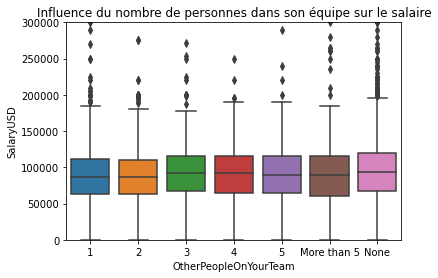

In [182]:
data_team=data_team.sort_values(by='OtherPeopleOnYourTeam', ascending = True)
plt.ylim(0,300000)
ax = sns.boxplot(x="OtherPeopleOnYourTeam", y="SalaryUSD", data=data_team).set_title('Influence du nombre de personnes dans son équipe sur le salaire')

<AxesSubplot:xlabel='OtherPeopleOnYourTeam', ylabel='SalaryUSD'>

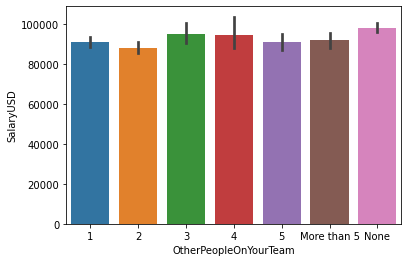

In [183]:
# Bar chart
sns.barplot(x=data_team.OtherPeopleOnYourTeam, y=data_companies.SalaryUSD)

## Le nombre d'année d'expérience dans ce type d'emploi a t il une influence sur votre salaire?

In [21]:
data_exp = pd.DataFrame(df1[['SalaryUSD', 'YearsWithThisTypeOfJob']])
data_exp.head()

,SalaryUSD,YearsWithThisTypeOfJob
0,115000.0,5
1,100000.0,6
2,70000.0,3
3,110000.0,25
4,79500.0,2


<AxesSubplot:xlabel='YearsWithThisTypeOfJob', ylabel='SalaryUSD'>

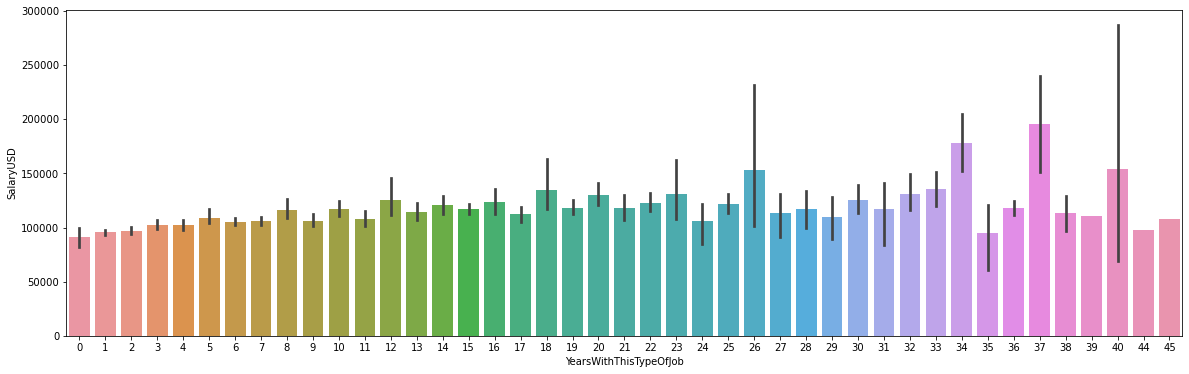

In [22]:
data_exp=data_exp.sort_values(by='YearsWithThisTypeOfJob', ascending = True)
#Bar chart
plt.figure(figsize=(20,6))
sns.barplot(x=data_exp.YearsWithThisTypeOfJob, y=data_exp.SalaryUSD)

<AxesSubplot:xlabel='YearsWithThisTypeOfJob', ylabel='SalaryUSD'>

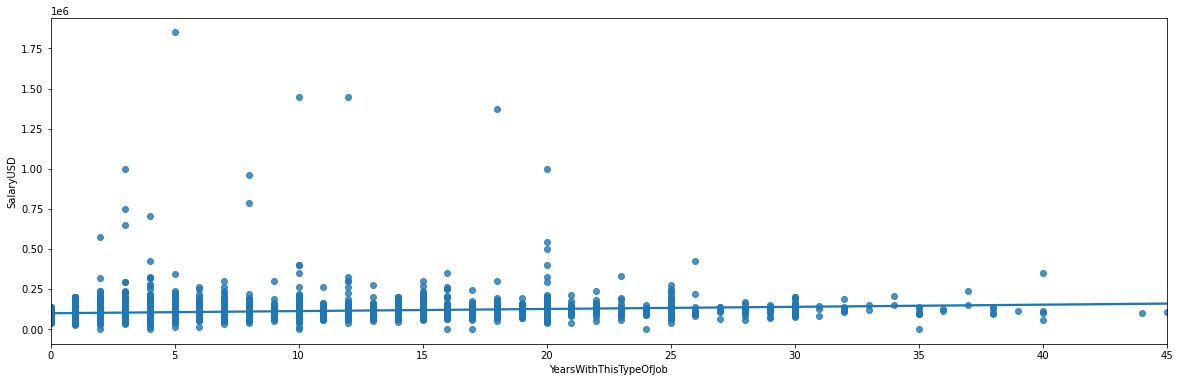

In [23]:
plt.figure(figsize=(20,6))
sns.regplot(x=data_exp['YearsWithThisTypeOfJob'], y=data_exp['SalaryUSD'])

In [24]:
data_exp.corr()

,SalaryUSD,YearsWithThisTypeOfJob
SalaryUSD,1.000000,0.153129
YearsWithThisTypeOfJob,0.153129,1.000000


Il y a une légère corrélation positive entre le salaire et le nombre d'années d'expérience.

## Il y-a-t-il une inégalité salariale entre les hommes et les femmes dans les emplois liées à la data aux Etats Unis?

In [25]:
data_gender = pd.DataFrame(df1[['JobTitle', 'SalaryUSD', 'Gender']])
data_gender.head()

,JobTitle,SalaryUSD,Gender
0,Database Admin,115000.0,Male
1,Developer,100000.0,Male
2,Analyst,70000.0,Male
3,Database Admin,110000.0,Male
4,Analyst,79500.0,Male


In [26]:
data_gender.drop(data_gender[data_gender['Gender'] == "Non-binary/third gender" ].index, inplace=True)

In [27]:
data_gender.drop(data_gender[data_gender['Gender'] == "Not Asked" ].index, inplace=True)
data_gender.drop(data_gender[data_gender['Gender'] == "Prefer not to say" ].index, inplace=True)
data_gender.drop(data_gender[data_gender['Gender'] == "other" ].index, inplace=True)

<AxesSubplot:xlabel='JobTitle', ylabel='SalaryUSD'>

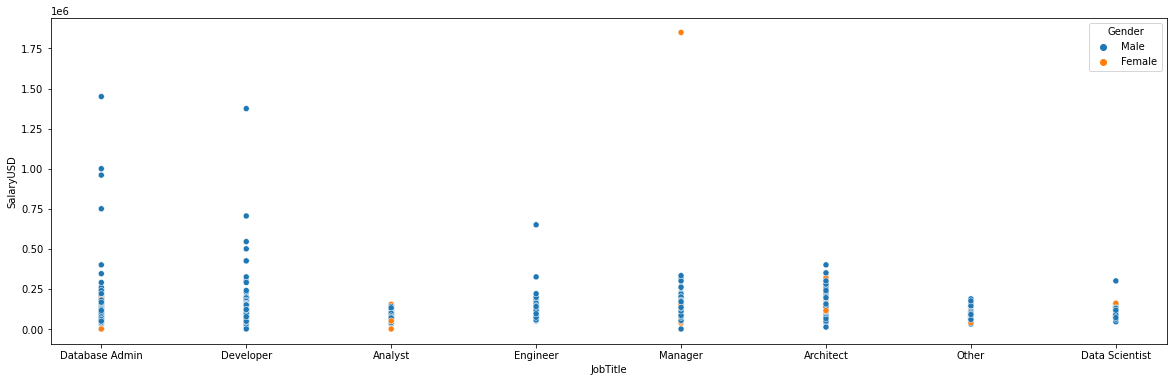

In [28]:
plt.figure(figsize=(20,6))
sns.scatterplot(x=data_gender['JobTitle'], y=data_gender['SalaryUSD'], hue=data_gender['Gender'])

## Si cette inégalité salariale existe, est-elle due au fait que les femmes soient moins bien représentées dans les jobs les mieux payés ou que pour un travail identique elles sont en moyenne moins bien payées?

## Y a t il une différence entre l'évolution salariale liées à l'expérience dans un même emploi entre les hommes et les femmes?

## Résumé en quelques lignes votre plan de carrière pour conquérir le rêve américain.